<a href="https://colab.research.google.com/github/Mahitab02/projects/blob/main/project_DM(KNN%2C_DT)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import needed libraries and take an object from them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
#load the data
Data=pd.read_csv("Acoustic_Extinguisher_Fire_Dataset22.csv")
Data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,BOS,Operation_Code,STATUS
0,4,kerosene,NaN,95.0,5.8,60.0,273.25,71053,0
1,6,lpg,50.0,106.0,NaN,22.0,297.30,84406B,1
2,4,thinner,160.0,105.0,4.4,36.0,304.75,35970,0
3,6,lpg,90.0,102.0,0.0,68.0,272.10,47559b,0
4,1,gasoline,180.0,87.0,2.8,5.0,225.85,47580,0


In [ ]:
#print all information about the Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SIZE            17446 non-null  int64  
 1   FUEL            17445 non-null  object 
 2   DISTANCE        17433 non-null  float64
 3   DESIBEL         17413 non-null  float64
 4   AIRFLOW         17382 non-null  float64
 5   FREQUENCY       17402 non-null  float64
 6   BOS             17426 non-null  float64
 7   Operation_Code  17444 non-null  object 
 8   STATUS          17446 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
#getting the number of the missed values in the data using the following function
Data.isnull().sum()

SIZE               0
FUEL               1
DISTANCE          13
DESIBEL           33
AIRFLOW           64
FREQUENCY         44
BOS               20
Operation_Code     2
STATUS             0
dtype: int64

In [ ]:
#we handle the problem of missing data by removind the row which contain the missing values 
#using dropna() function we drop the missing valus's rows
Data=Data.dropna()

In [ ]:
#then checking whether there are missing values or not again to make sure that we handle the problem of missing values
Data.isnull().sum()

SIZE              0
FUEL              0
DISTANCE          0
DESIBEL           0
AIRFLOW           0
FREQUENCY         0
BOS               0
Operation_Code    0
STATUS            0
dtype: int64

In [ ]:
#print information about the Data after remove missing values
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17273 entries, 2 to 17445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SIZE            17273 non-null  int64  
 1   FUEL            17273 non-null  object 
 2   DISTANCE        17273 non-null  float64
 3   DESIBEL         17273 non-null  float64
 4   AIRFLOW         17273 non-null  float64
 5   FREQUENCY       17273 non-null  float64
 6   BOS             17273 non-null  float64
 7   Operation_Code  17273 non-null  object 
 8   STATUS          17273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


<AxesSubplot:>

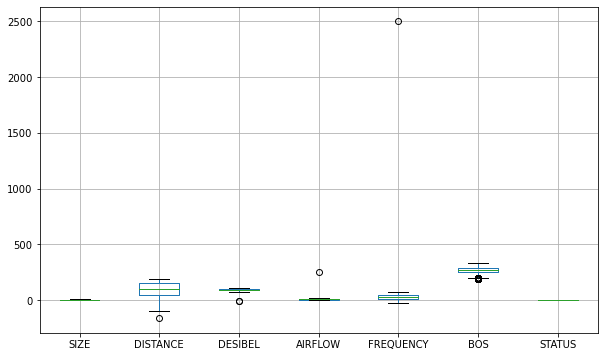

In [ ]:
#boxplot when data is noise
plt.figure(figsize = (10, 6))
Data.boxplot()

In [ ]:
#remove outliers from column'DISTANCE'
#remove all data that bigger than max and smaller than min after we calculate max, min values
#by change all outlier values to null vales to drop them  
for x in ['DISTANCE']:
    Q75,Q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan

In [ ]:
#sum all null values in column 'DISTANCE'
Data.isnull().sum()

SIZE              0
FUEL              0
DISTANCE          1
DESIBEL           0
AIRFLOW           0
FREQUENCY         0
BOS               0
Operation_Code    0
STATUS            0
dtype: int64

In [ ]:
#drop all null values that we found in column 'DISTANCE' 
Data = Data.dropna(axis = 0)

In [ ]:
#print information about the Data after remove null values that we found in 'DISTANCE' column
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17272 entries, 2 to 17445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SIZE            17272 non-null  int64  
 1   FUEL            17272 non-null  object 
 2   DISTANCE        17272 non-null  float64
 3   DESIBEL         17272 non-null  float64
 4   AIRFLOW         17272 non-null  float64
 5   FREQUENCY       17272 non-null  float64
 6   BOS             17272 non-null  float64
 7   Operation_Code  17272 non-null  object 
 8   STATUS          17272 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
#remove outliers from column 'AIRFLOW'
#remove all data that bigger than max and smaller than min after we calculate max, min values
#by change all outlier values to null vales to drop them 
for y in ['AIRFLOW']:
    Q75,Q25 = np.percentile(Data.loc[:,y],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    Data.loc[Data[y] < min,y] = np.nan
    Data.loc[Data[y] > max,y] = np.nan

In [ ]:
#sum all null vales in 'AIRFLOW' column
Data.isnull().sum()

SIZE              0
FUEL              0
DISTANCE          0
DESIBEL           0
AIRFLOW           1
FREQUENCY         0
BOS               0
Operation_Code    0
STATUS            0
dtype: int64

In [ ]:
#drop all null values that we found in 'AIRFLOW' column
Data = Data.dropna(axis = 0)

In [ ]:
#print information about the Data after remove null values that we found in 'AIRFLOW' column
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17271 entries, 2 to 17445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SIZE            17271 non-null  int64  
 1   FUEL            17271 non-null  object 
 2   DISTANCE        17271 non-null  float64
 3   DESIBEL         17271 non-null  float64
 4   AIRFLOW         17271 non-null  float64
 5   FREQUENCY       17271 non-null  float64
 6   BOS             17271 non-null  float64
 7   Operation_Code  17271 non-null  object 
 8   STATUS          17271 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
#remove outliers from column 'BOS'
#remove all data that bigger than max and smaller than min after we calculate max, min values
#by change all outlier values to null vales to drop them 
for z in ['BOS']:
    Q75,Q25 = np.percentile(Data.loc[:,z],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    Data.loc[Data[z] < min,z] = np.nan
    Data.loc[Data[z] > max,z] = np.nan

In [ ]:
#sum all null vales in 'BOS' column
Data.isnull().sum()

SIZE               0
FUEL               0
DISTANCE           0
DESIBEL            0
AIRFLOW            0
FREQUENCY          0
BOS               59
Operation_Code     0
STATUS             0
dtype: int64

In [ ]:
#drop all null values that we found in 'BOS' column
Data = Data.dropna(axis = 0)

In [ ]:
#print information about the Data after remove null values that we found in 'BOS' column
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17212 entries, 2 to 17445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SIZE            17212 non-null  int64  
 1   FUEL            17212 non-null  object 
 2   DISTANCE        17212 non-null  float64
 3   DESIBEL         17212 non-null  float64
 4   AIRFLOW         17212 non-null  float64
 5   FREQUENCY       17212 non-null  float64
 6   BOS             17212 non-null  float64
 7   Operation_Code  17212 non-null  object 
 8   STATUS          17212 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
#remove outliers from column 'FREQUENCY'
#remove all data that bigger than max and smaller than min after we calculate max, min values
#by change all outlier values to null vales to drop them 
for j in ['FREQUENCY']:
    Q75,Q25 = np.percentile(Data.loc[:,j],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    Data.loc[Data[j] < min,j] = np.nan
    Data.loc[Data[j] > max,j] = np.nan

In [ ]:
#sum all null vales in 'FREQUENCY' column
Data.isnull().sum()

SIZE              0
FUEL              0
DISTANCE          0
DESIBEL           0
AIRFLOW           0
FREQUENCY         1
BOS               0
Operation_Code    0
STATUS            0
dtype: int64

In [ ]:
#drop all null values that we found in 'FREQUENCY' column
Data = Data.dropna(axis = 0)

In [ ]:
#print information about the Data after remove null values that we found in 'FREQUENCY' column
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17211 entries, 2 to 17445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SIZE            17211 non-null  int64  
 1   FUEL            17211 non-null  object 
 2   DISTANCE        17211 non-null  float64
 3   DESIBEL         17211 non-null  float64
 4   AIRFLOW         17211 non-null  float64
 5   FREQUENCY       17211 non-null  float64
 6   BOS             17211 non-null  float64
 7   Operation_Code  17211 non-null  object 
 8   STATUS          17211 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


In [ ]:
#remove outliers from column 'DESIBEL'
#remove all data that bigger than max and smaller than min after we calculate max, min values
#by change all outlier values to null vales to drop them 
for i in ['DESIBEL']:
    Q75,Q25 = np.percentile(Data.loc[:,i],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    Data.loc[Data[i] < min,i] = np.nan
    Data.loc[Data[i] > max,i] = np.nan

In [ ]:
#sum all null vales in 'DESIBEL' column
Data.isnull().sum()

SIZE              0
FUEL              0
DISTANCE          0
DESIBEL           2
AIRFLOW           0
FREQUENCY         0
BOS               0
Operation_Code    0
STATUS            0
dtype: int64

In [ ]:
#drop all null values that we found in column 'DESIBEL'
Data = Data.dropna(axis = 0)

In [ ]:
#print information about the Data after remove null values that we found in 'DESIBEL' column
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17209 entries, 2 to 17445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SIZE            17209 non-null  int64  
 1   FUEL            17209 non-null  object 
 2   DISTANCE        17209 non-null  float64
 3   DESIBEL         17209 non-null  float64
 4   AIRFLOW         17209 non-null  float64
 5   FREQUENCY       17209 non-null  float64
 6   BOS             17209 non-null  float64
 7   Operation_Code  17209 non-null  object 
 8   STATUS          17209 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


<AxesSubplot:>

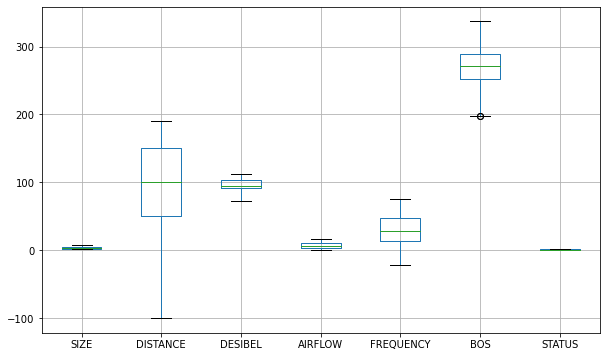

In [ ]:
#boxplot after cleaning the data from noise,null and remove outliers
plt.figure(figsize = (10, 6))
Data.boxplot()

In [ ]:
#show the duplicate
Data[Data.duplicated()].head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,BOS,Operation_Code,STATUS
6936,4,thinner,160.0,105.0,4.4,36.0,304.75,35970,0
6937,6,lpg,90.0,102.0,0.0,68.0,272.10,47559b,0
6938,1,gasoline,180.0,87.0,2.8,5.0,225.85,47580,0
6939,2,thinner,170.0,76.0,0.0,1.0,225.80,47591d,0
7885,3,kerosene,60.0,105.0,12.5,50.0,310.75,22749,1


In [ ]:
#sum all duplicated data
Data.duplicated().sum()

80

In [ ]:
#drop all duplicated data
Data.drop_duplicates(inplace=True)

In [ ]:
#sum all duplicate data to make sure that there is no duplication
Data.duplicated().sum()

0

In [ ]:
#this column don't related to our output(status)so we remove it
Data=Data.drop(columns="Operation_Code")
Data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,BOS,STATUS
2,4,thinner,160.0,105.0,4.4,36.0,304.75,0
3,6,lpg,90.0,102.0,0.0,68.0,272.10,0
4,1,gasoline,180.0,87.0,2.8,5.0,225.85,0
5,2,thinner,170.0,76.0,0.0,1.0,225.80,0
6,2,kerosene,80.0,75.0,0.0,1.0,217.25,0
...,...,...,...,...,...,...,...,...
17440,1,thinner,80.0,106.0,11.2,46.0,275.30,1
17441,2,thinner,50.0,82.0,3.2,2.0,250.10,0
17442,5,kerosene,160.0,94.0,1.9,55.0,251.70,0
17444,1,kerosene,20.0,105.0,13.5,30.0,307.75,1


In [ ]:
#create a matrix filled with correlation values for each two columns
Data.corr()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,BOS,STATUS
SIZE,1.000000,-0.001222,0.000578,0.000070,-0.000310,0.001389,-0.097070
DISTANCE,-0.001222,1.000000,-0.238583,-0.708477,0.002117,-0.197739,-0.644349
DESIBEL,0.000578,-0.238583,1.000000,0.369381,0.557475,0.812272,0.197569
AIRFLOW,0.000070,-0.708477,0.369381,1.000000,-0.221464,0.303507,0.760283
FREQUENCY,-0.000310,0.002117,0.557475,-0.221464,1.000000,0.452123,-0.250557
BOS,0.001389,-0.197739,0.812272,0.303507,0.452123,1.000000,0.159832
STATUS,-0.097070,-0.644349,0.197569,0.760283,-0.250557,0.159832,1.000000


In [ ]:
#create a matrix filled with correlation values for each two columns with absolute value
CorrelationMatrix = Data.corr().abs()
CorrelationMatrix

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,BOS,STATUS
SIZE,1.000000,0.001222,0.000578,0.000070,0.000310,0.001389,0.097070
DISTANCE,0.001222,1.000000,0.238583,0.708477,0.002117,0.197739,0.644349
DESIBEL,0.000578,0.238583,1.000000,0.369381,0.557475,0.812272,0.197569
AIRFLOW,0.000070,0.708477,0.369381,1.000000,0.221464,0.303507,0.760283
FREQUENCY,0.000310,0.002117,0.557475,0.221464,1.000000,0.452123,0.250557
BOS,0.001389,0.197739,0.812272,0.303507,0.452123,1.000000,0.159832
STATUS,0.097070,0.644349,0.197569,0.760283,0.250557,0.159832,1.000000


In [ ]:
#Selecting the Upper triangular matrix
up_tri = CorrelationMatrix.where(np.triu(np.ones(CorrelationMatrix.shape),k=1).astype(np.bool))
up_tri

C:\Users\MCC\AppData\Local\Temp/ipykernel_2752/2541172571.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up_tri = CorrelationMatrix.where(np.triu(np.ones(CorrelationMatrix.shape),k=1).astype(np.bool))


,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,BOS,STATUS
SIZE,NaN,0.001222,0.000578,0.000070,0.000310,0.001389,0.097070
DISTANCE,NaN,NaN,0.238583,0.708477,0.002117,0.197739,0.644349
DESIBEL,NaN,NaN,NaN,0.369381,0.557475,0.812272,0.197569
AIRFLOW,NaN,NaN,NaN,NaN,0.221464,0.303507,0.760283
FREQUENCY,NaN,NaN,NaN,NaN,NaN,0.452123,0.250557
BOS,NaN,NaN,NaN,NaN,NaN,NaN,0.159832
STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#this method help us to know which columns with high correlation that we will drop
C_drop = [column for column in up_tri.columns if any(up_tri[column] >= 0.8)]
print(C_drop)

['BOS']


In [ ]:
#Drop columns  with high correlation 'BOS'
Data=Data.drop(Data[C_drop],axis=1)
Data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
2,4,thinner,160.0,105.0,4.4,36.0,0
3,6,lpg,90.0,102.0,0.0,68.0,0
4,1,gasoline,180.0,87.0,2.8,5.0,0
5,2,thinner,170.0,76.0,0.0,1.0,0
6,2,kerosene,80.0,75.0,0.0,1.0,0


In [ ]:
#by using cut () function we do the discretization to each numerical attribute
#T_SIZE is the types of the size which divided into 3 parts
Data['T_SIZE'] = pd.cut(Data['SIZE'],3,labels=['small','medium','larg'])

In [ ]:
#T_DISTANCE is the types of distance which divided into 5 part
Data['T_DISTANCE'] = pd.cut(Data['DISTANCE'],5,labels=['short','Below_average','Average','Above_Average','long'])

In [ ]:
#T_DESTBEL is how strong the sound
Data['T_DESIBEL'] = pd.cut(Data['DESIBEL'],3,labels=['low','normal','high'])

In [ ]:
#T_AIRFLOW is how much the airflow strong
Data['T_AIRFLOW'] = pd.cut(Data['AIRFLOW'],3,labels=['low','normal','high'])

In [ ]:
#T_FREQUENCY is the how strong the frequency  of each device in the system
Data['T_FREQUENCY'] = pd.cut(Data['FREQUENCY'],3,labels=['low','normal','high'])

In [ ]:
#final shape for the dataset after the preprocessing on it 
Data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,T_SIZE,T_DISTANCE,T_DESIBEL,T_AIRFLOW,T_FREQUENCY
2,4,thinner,160.0,105.0,4.4,36.0,0,medium,long,high,low,normal
3,6,lpg,90.0,102.0,0.0,68.0,0,larg,Above_Average,high,low,high
4,1,gasoline,180.0,87.0,2.8,5.0,0,small,long,normal,low,low
5,2,thinner,170.0,76.0,0.0,1.0,0,small,long,low,low,low
6,2,kerosene,80.0,75.0,0.0,1.0,0,small,Above_Average,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...
17440,1,thinner,80.0,106.0,11.2,46.0,1,small,Above_Average,high,normal,high
17441,2,thinner,50.0,82.0,3.2,2.0,0,small,Average,low,low,low
17442,5,kerosene,160.0,94.0,1.9,55.0,0,medium,long,normal,low,high
17444,1,kerosene,20.0,105.0,13.5,30.0,1,small,Average,high,high,normal


In [ ]:
#encoding the fuel column from categorical data to numeric for the model to understand and puting it in the datafarme
le = LabelEncoder()
le.fit(Data["FUEL"])
Data["FUEL"] = le.transform(Data["FUEL"])
# dividing data into train and test
X_train, X_test, y_train, y_test = train_test_split(Data[["SIZE","FUEL", "DISTANCE", "AIRFLOW", "FREQUENCY"]], Data["STATUS"], test_size=0.2, random_state=100)

In [ ]:
#fit training data with n_neighbors = 1001
KNN = KNeighborsClassifier(n_neighbors = 1001)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1001)

In [ ]:
#predict training data with n_neighbors = 1001
p_KNN = KNN.predict(X_test)
p_KNN

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
#calculate Accuracy after training
Accuracy_KNN = accuracy_score(y_test, p_KNN)
Accuracy_KNN

0.8534734384121424

In [ ]:
#Get the confusion matrix of KNN
CM_KNN = confusion_matrix(y_test, p_KNN)
print(CM_KNN)

[[1381  346]
 [ 156 1543]]


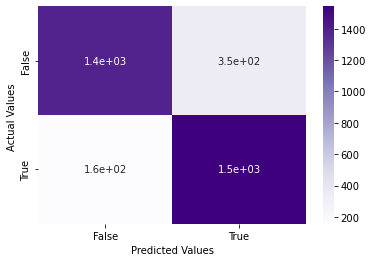

In [ ]:
#we use heatmap() method to return the matplotlib axes that can be stored in a variable.
axis = sns.heatmap(CM_KNN, annot=True, cmap='Purples')

#set the title of x-axis, y-axis
axis.set_xlabel('Predicted Values')
axis.set_ylabel('Actual Values ');

#Tick labels that used to denote the datapoints on the axes and it must be in ascending order.
axis.xaxis.set_ticklabels(['False','True'])
axis.yaxis.set_ticklabels(['False','True'])

#ploting the confusion matrix of KNN
plt.show()

In [ ]:
#fitting test data using manhattan with n_neighbors = 1001
knn_manhattan = KNeighborsClassifier(n_neighbors=1001, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
p_manhattan= knn_manhattan.predict(X_test)
p_manhattan

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
#calculate Accuracy after test
Accuracy_manhattan = accuracy_score(y_test, p_manhattan)
Accuracy_manhattan

0.8590192644483362

In [ ]:
#making the decision tree model and fitting it to the data
#predict responce for my test data
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf.fit(X_train,y_train)
#to predict the output of x)test subset
P_DT = clf.predict(X_test)
P_DT

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
#calculate Accuracy after test
Accuracy_DecisionTree = accuracy_score(y_test, P_DT)
Accuracy_DecisionTree

0.8523058960887332

In [ ]:
#Making the Confusion Matrix of decision tree
CM_DT = confusion_matrix(y_test, P_DT)
print(CM_DT)

[[1422  305]
 [ 201 1498]]


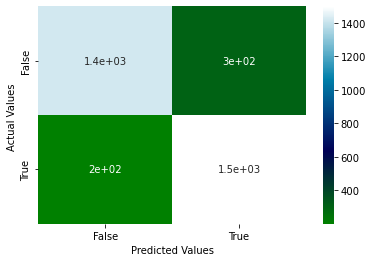

In [ ]:
#we use heatmap() method to return the matplotlib axes that can be stored in a variable.
axis = sns.heatmap(CM_DT, annot=True, cmap='ocean')

#set the title of x-axis, y-axis
axis.set_xlabel('Predicted Values')
axis.set_ylabel('Actual Values ');

#Tick labels that used to denote the datapoints on the axes and it must be in ascending order.
axis.xaxis.set_ticklabels(['False','True'])
axis.yaxis.set_ticklabels(['False','True'])

#ploting the confusion matrix of decision tree
plt.show()

In [ ]:
#Feature Scaling
Sd_S = StandardScaler()
X_train = Sd_S.fit_transform(X_train)
X_test = Sd_S.transform(X_test)

In [ ]:
#Training the Naive Bayes model on the Training set
class_model = GaussianNB()
class_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicting the Test set results
P_naive = class_model.predict(X_test)

In [ ]:
#Calculate accuracy in Naive BayesMaking the Confusion Matrix
accuracy_naive = accuracy_score(y_test,P_naive)
accuracy_naive

0.865440747227087

In [ ]:
#Making the Confusion Matrix
CM_naive = confusion_matrix(y_test, P_naive)
print(CM_naive)

[[1552  175]
 [ 286 1413]]


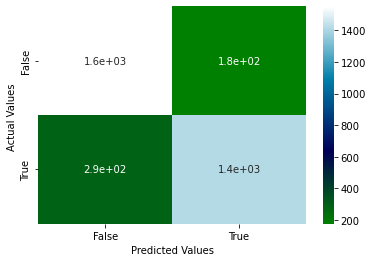

In [ ]:
#we use heatmap() method to return the matplotlib axes that can be stored in a variable.
axis = sns.heatmap(CM_naive, annot=True, cmap='ocean')

#set the title of x-axis, y-axis
axis.set_xlabel('Predicted Values')
axis.set_ylabel('Actual Values ');

#Tick labels that used to denote the datapoints on the axes and it must be in ascending order.
axis.xaxis.set_ticklabels(['False','True'])
axis.yaxis.set_ticklabels(['False','True'])

#ploting the confusion matrix naive bayes
plt.show()